# Cleaning and Analyzing Employee Exit Surveys

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to **some kind of dissatisfaction?** What about employees who have been there longer?

- Are younger employees resigning due to **some kind of dissatisfaction?** What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

** A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns. **

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated")
tafe_survey = pd.read_csv("tafe_survey.csv")
pd.set_option('display.max_columns', 90)



In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

### Selecting relevant data

We are going to drop the columns that do not contain relevant data on the **dissatisfaction**, **worktime period** and **age**, in order to standardize both datasets columns to merge them.

In [3]:
# deleting unecessary columns for the dete survey data

columns_to_drop = dete_survey.columns[28:48]
dete_survey_updated = dete_survey.drop(columns = columns_to_drop, axis = 1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 36 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [4]:
# deleting unnecessary data for the tafe survey

columns_to_drop = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(columns = columns_to_drop, axis = 1)
tafe_survey_updated.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

### Formatting column names

First, I remove the parameters that give information on the status and type of individuals.

In [5]:
dete_survey_updated.columns = (dete_survey_updated.columns
                       .str.lower()
                       .str.strip()
                       .str.replace(' ', '_'))
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,health_&_safety,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
new_col_names = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type.': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service'
}

tafe_survey_updated = tafe_survey_updated.rename(columns = new_col_names)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,Employment Type. Employment Type,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Sorting exit explanations

In [7]:
dete_survey_updated.separationtype.value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [8]:
tafe_survey_updated.separationtype.value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [9]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [10]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('^Resignation') == True].copy()

I only kept the Resignations as the other conditions are not interesting in our study (Retirement, Transfer or Termination are not of the employees initiative). 

### Check the Data bruv

#### Checking up cessation years

In [11]:
dete_resignations.cease_date.value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

In [12]:
dete_resignations.cease_date =(dete_resignations.cease_date
                               .str.split('/')
                               .str[-1])
dete_resignations.cease_date = dete_resignations.cease_date.astype(float)

In [13]:
dete_resignations.cease_date.value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

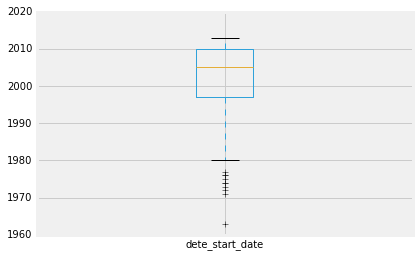

In [14]:
%matplotlib inline

boxplot = dete_resignations.boxplot(column = ['dete_start_date'])
boxplot

There seems to be some mistakes in the data. Outliers may say that some of the data registered as resigntion may actually be a retirement, given the old age of that people.

In [15]:
tafe_resignations.cease_date.value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

### Creating a institute_service variable for the dete_survey

By creating such column, we can seamlessly integrate the dete and tafe survey results + filter time in the workplace and it's relation to resignation

In [16]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

### Getting dissatisfaction

The dete survey contains 9 columns for different types of dissatisfactions and the tafe survey only 2.

**tafe_survey_updated:**

- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction


**dafe_survey_updated:**

- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload


Hence, We need to create a single column in each dataset that will identify if the worker has resigned because of a dissatisfaction or not. 

#### Tafe survey

In [17]:
#Check unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [18]:
#Check unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [19]:
# function to attribute True, False or NaN depending on element
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

In [20]:
# create "dissatisfied" column for tafe_survey, merging results from "Contributing Factors" colmumns
tafe_resignations['dissatisfied'] = (tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction' ]]
                                     .applymap(update_vals)
                                     .any(axis = 1, skipna = False)
                                    )

# create a copy to avoid SettingWithCopy Warning
tafe_resignations_up = tafe_resignations.copy()


In [21]:
tafe_resignations_up.dissatisfied.value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

#### Dete survey

In [22]:
dete_resignations.job_dissatisfaction.value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [23]:
# create "dissatisfied" column for dete_survey, merging results from selected colmumns
dete_resignations['dissatisfied']= (dete_resignations[['job_dissatisfaction', 
                                                       'dissatisfaction_with_the_department', 
                                                       'physical_work_environment', 
                                                       'lack_of_recognition', 
                                                       'lack_of_job_security', 
                                                       'work_location', 
                                                       'employment_conditions', 
                                                       'work_life_balance', 
                                                       'workload']].any(1, skipna= False))

# create a copy to avoid SettingWithCopy Warning
dete_resignations_up = dete_resignations.copy()

In [36]:
dete_resignations_up.dissatisfied.value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

#### Combining the  data 

In [25]:
dete_resignations_up["institute"] = 'DETE'
tafe_resignations_up["institute"] = 'TAFE'

In [26]:
frames = [dete_resignations_up, tafe_resignations_up]
combined = pd.concat(frames)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 55 columns):
Contributing Factors. Career Move - Private Sector                           332 non-null object
Contributing Factors. Career Move - Public Sector                            332 non-null object
Contributing Factors. Career Move - Self-employment                          332 non-null object
Contributing Factors. Dissatisfaction                                        332 non-null object
Contributing Factors. Ill Health                                             332 non-null object
Contributing Factors. Interpersonal Conflict                                 332 non-null object
Contributing Factors. Job Dissatisfaction                                    332 non-null object
Contributing Factors. Maternity/Family                                       332 non-null object
Contributing Factors. NONE                                                   332 non-null object
Contributing Factors. 

In [27]:
# drop columns  with less than 500 non-null values (having only data from one survey)
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 9 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         643 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: float64(2), object(7)
memory usage: 50.9+ KB


### Standardizing Career Stages


In [28]:
# exploring combined values for the length of service
combined_updated.institute_service.value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


In [29]:
# create a standardized column for the years of service
combined_updated['institute_service_up'] = (combined_updated.institute_service
                                      .astype(str)
                                      .str.split('-').str[0]
                                      .str.replace('Less than 1 year', '0')
                                      .str.replace('More than 20 years', '20')
                                      .astype(float))

As expressed in this article (https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), we will look at carreer stages in the company.

We divide them in: 

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [30]:
# function to sort in categories of carreer stage
def career_stage(x):
    if x <= 3:
        return 'New'
    elif x <= 6:
        return 'Experienced'
    elif x<= 10:
        return 'Established'
    else:
        return 'Veteran'
    
# apply function
combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(career_stage)

In [31]:
combined_updated.service_cat.value_counts()

New            276
Veteran        224
Experienced     89
Established     62
Name: service_cat, dtype: int64

### Analyzing dissatisfaction based on career stage at the institute

In [32]:
combined_updated.dissatisfied.value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [33]:
# fill the remaining NaN values
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)
combined_updated["dissatisfied"].value_counts()

False    411
True     240
Name: dissatisfied, dtype: int64

In [34]:
# calculate proportion of employees who resigned based on career stage
pivot = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied', aggfunc = np.mean)
pivot

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.404494
New,0.289855
Veteran,0.410714


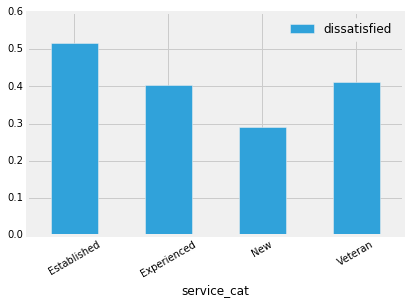

In [40]:
# plotting results
pivot.plot(kind = 'bar', rot = 30)

Given the data we plotted, we can see that established employees are more likely to quit their jobs due to dissatisfaction than people with less than 7 years ('Established' bottom threshhold). Nevertheless, it would be interesting to have additionnal data on the cause of resignation.

### Analyzing dissatisfaction based on age

In [45]:
# check age unique values
combined_updated.age.value_counts().sort_index()

20 or younger    10
21  25           33
21-25            29
26  30           32
26-30            35
31  35           32
31-35            29
36  40           32
36-40            41
41  45           45
41-45            48
46  50           39
46-50            42
51-55            71
56 or older      29
56-60            26
61 or older      23
Name: age, dtype: int64

In [65]:
# standardize age bins for analysis
combined_updated['age_up'] = (combined_updated['age']
                              .astype(str)
                              .str.replace('  ','-')
                              .str.replace('56 or older', '56-60'))

In [66]:
# check standardization success
combined_updated['age_up'].value_counts().sort_index()

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56-60            55
61 or older      23
nan              55
Name: age_up, dtype: int64

In [67]:
# calculate proportion of employees who resigned based age group
pivot_age = combined_updated.pivot_table(index = 'age_up', values = 'dissatisfied')
pivot_age

,dissatisfied
age_up,
20 or younger,0.200000
21-25,0.306452
26-30,0.417910
31-35,0.377049
36-40,0.342466
41-45,0.376344
46-50,0.382716
51-55,0.422535
56-60,0.381818


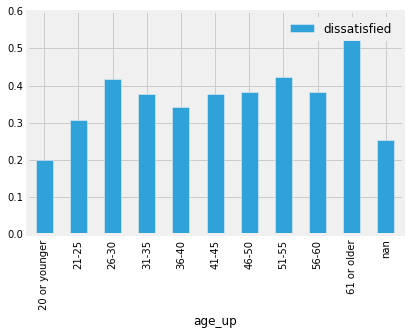

In [68]:
pivot_age.plot(kind = 'bar')